In [1]:
from matplotlib import rc
%matplotlib notebook
from lmfit import Model



rc('text', usetex=False)
rc("font", family="serif")
import numpy as np #notwendige Pakete laden
import matplotlib.pyplot as plt
import matplotlib
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator)
import pandas as pd
from PIL import Image


In [2]:
matplotlib.use("pgf")
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False,
    "figure.figsize": (6.48, 2.75),
    "pgf.texsystem": "pdflatex",
    "font.size": 13,
    "text.latex.preamble" :  r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc}\usepackage[output-decimal-marker={,}]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    "pgf.preamble": r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc}\usepackage[output-decimal-marker={,}]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    #r"\usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}"])
})

In [3]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)
    

In [4]:
capture_nr, exposure_sec, sigma, mean =  np.loadtxt("dark_auswertung_02032022/20220302_dark_data.csv", delimiter=",", unpack=True)




<ErrorbarContainer object of 3 artists>

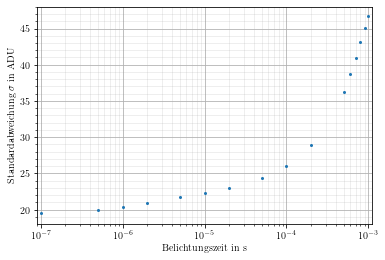

In [23]:
%matplotlib inline
#grob
fig, axs = plt.figure(), plt.gca()
#fig.suptitle('MOENCH detector characteristics')
plt.subplots_adjust(hspace =0.6)
axes = axs
axes.set_xlim((0.9e-7,1.1e-3))
axes.set_ylim((18, 48))
#axes.set_title('Soft X-Ray Range')
axes.set_xlabel(r'Belichtungszeit in s')
axes.set_xscale('log')
axes.set_ylabel(r"Standardabweichung $\sigma$ in ADU")
axes.grid(which='major')
axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(MultipleLocator(200))
# axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
# axes.yaxis.set_major_locator(MultipleLocator(50))
axes.errorbar(exposure_sec, sigma, fmt="o", ms=2)

In [24]:
fig.savefig('noise.pgf', bbox_inches='tight', pad_inches=0.0)

<ErrorbarContainer object of 3 artists>

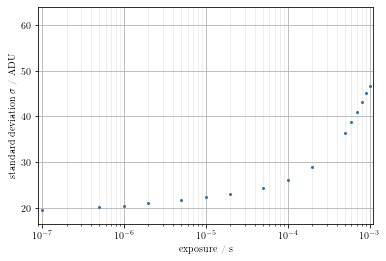

In [9]:
%matplotlib inline
#grob
fig, axs = plt.figure(), plt.gca()
#fig.suptitle('MOENCH detector characteristics')
plt.subplots_adjust(hspace =0.6)
axes = axs
axes.set_xlim((0.9e-7,1.1e-3))
#axes.set_title('Soft X-Ray Range')
axes.set_xlabel(r'exposure / s')
axes.set_xscale('log')
axes.set_ylabel(r"standard deviation $\sigma$ / ADU")
axes.grid(which='major')
axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(MultipleLocator(200))
# axes.xaxis.set_minor_locator(AutoMinorLocator(5))
# axes.yaxis.set_minor_locator(AutoMinorLocator(5))
# axes.yaxis.set_major_locator(MultipleLocator(50))
axes.errorbar(exposure_sec, sigma, fmt="o", ms=2)

In [10]:
fig.savefig('noise_moench_engl.png', bbox_inches='tight', pad_inches=0.1, dpi=300)